## wav utils

In [1]:
from utils import wav_utils


filename = "./samples/test.wav"
target_sampling_rate = 22050


sampling_rate, y = wav_utils.read_wav(filename=filename, target_sampling_rate=target_sampling_rate)
wav_utils.write_wav(filename="./samples/test_resampled.wav", target_sampling_rate=sampling_rate, y=y)
wav_utils.visualize_wav(y=y, sampling_rate=sampling_rate)

/home/choihk/work/github/Digital-Signal-Processing/utils/wav_utils.py:31: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sampling_rate, y = wavfile.read(filename=filename)


## stft utils

In [6]:
from utils import stft_utils
import torch


n_fft = 1024
hop_length = 256
win_length = 1024
n_mel_channels = 80
spectral_normalize = True
epsilon = 1e-6


linear = stft_utils.linear_spectrogram(
    y=torch.from_numpy(y).unsqueeze(0), 
    n_fft=n_fft, 
    hop_length=hop_length, 
    win_length=win_length, 
    epsilon=epsilon, 
    center=False, 
    return_complex=False, 
    spectral_normalize=spectral_normalize, 
)

mel1 = stft_utils.linear_to_mel(
    y=stft_utils.denormalize(linear) if spectral_normalize else linear, 
    sampling_rate=sampling_rate, 
    n_fft=n_fft, 
    n_mel_channels=n_mel_channels, 
    epsilon=epsilon, 
    spectral_normalize=spectral_normalize, 
)

mel2 = stft_utils.mel_spectrogram(
    y=torch.from_numpy(y).unsqueeze(0), 
    sampling_rate=sampling_rate, 
    n_mel_channels=n_mel_channels, 
    n_fft=n_fft, 
    hop_length=hop_length, 
    win_length=win_length, 
    epsilon=epsilon, 
    center=False, 
    return_complex=False, 
    spectral_normalize=spectral_normalize, 
)

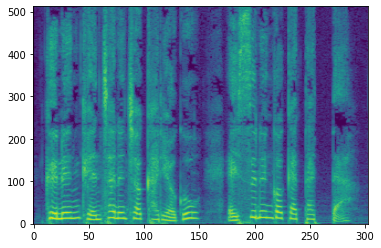

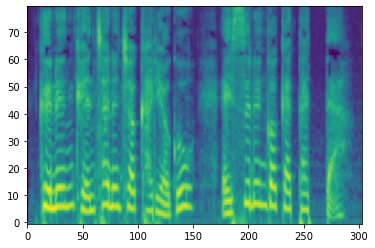

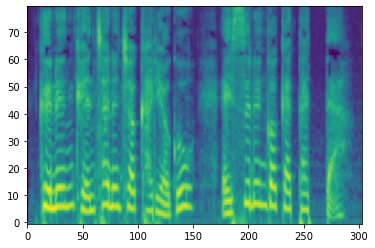

In [7]:
import matplotlib.pyplot as plt



plt.imshow(linear.squeeze(0).numpy(), origin='lower', aspect='auto')
plt.show()

plt.imshow(mel1.squeeze(0).numpy(), origin='lower', aspect='auto')
plt.show()

plt.imshow(mel2.squeeze(0).numpy(), origin='lower', aspect='auto')
plt.show()

In [8]:
mel1.max()

tensor(1.4299, dtype=torch.float64)

In [9]:
mel2.min()

tensor(-9.9622, dtype=torch.float64)